In [2]:
 import pandas as pd
# filename = 'Bitcoin Historical Data.csv'
# df = pd.read_csv(filename)

# Display data
# print(df)


In [1]:
pip install yfinance

In [3]:
import yfinance as yf

# Retrieve Ethereum data
ethereum = yf.Ticker("ETH-USD")

# Get historical market data
eth_history = ethereum.history(period="6mo")

In [4]:
pip install matplotlib

In [5]:
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


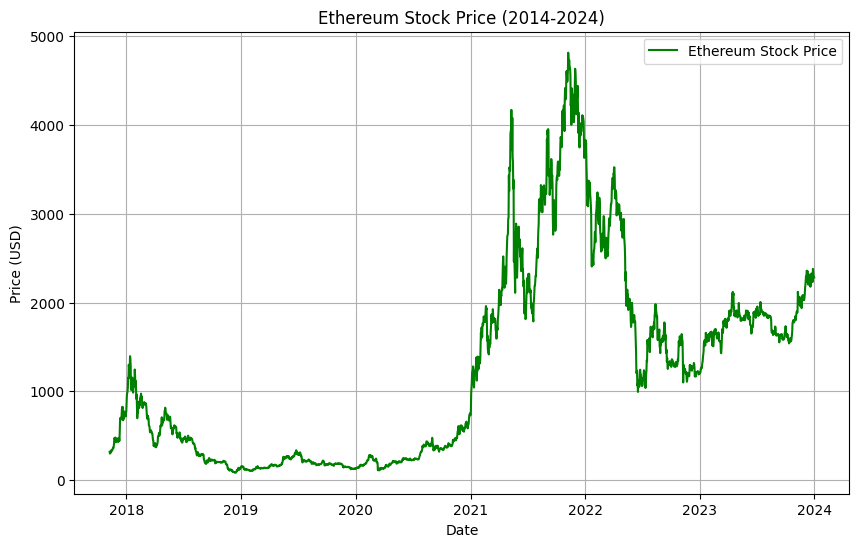

In [6]:

# Fetching Ethereum stock data
ETH_stock = yf.download("ETH-USD", start='2014-01-01', end='2024-01-01')

# Plotting the Close price
plt.figure(figsize=(10, 6))
plt.plot(ETH_stock.index, ETH_stock['Close'], label='Ethereum Stock Price', color='green')
plt.title('Ethereum Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


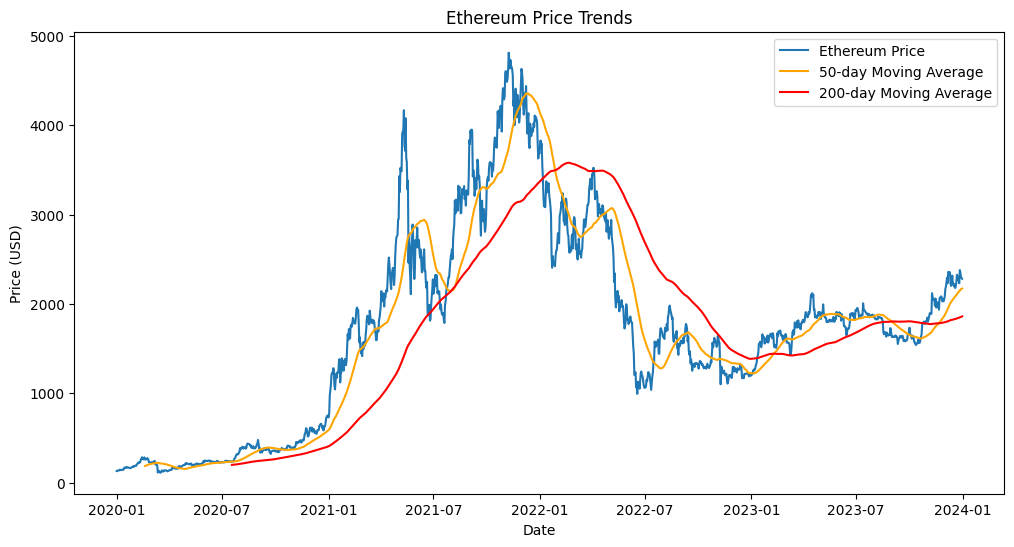

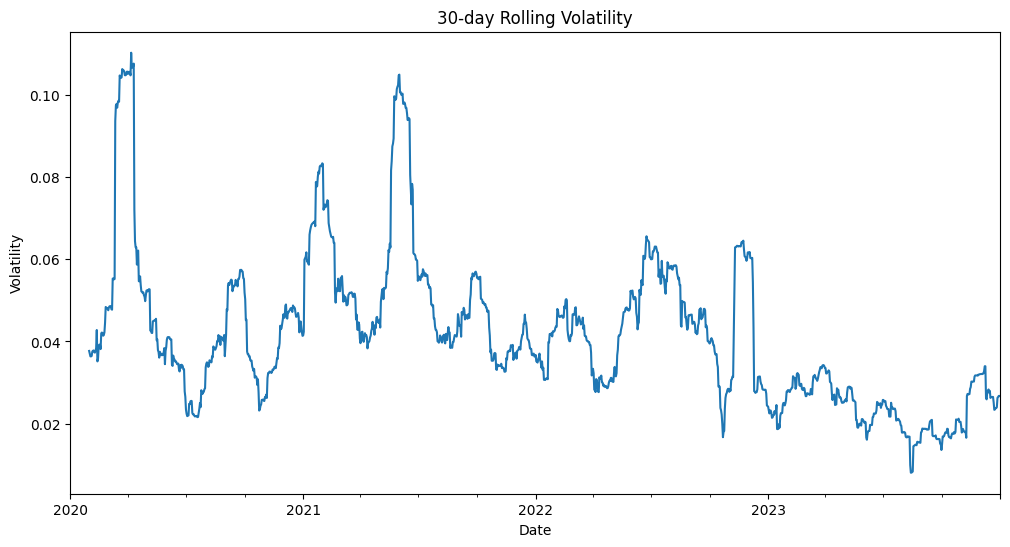

[                       0%                       ]

Return Statistics:
count    1460.000000
mean        0.003016
std         0.045420
min        -0.423472
25%        -0.017382
50%         0.001641
75%         0.024672
max         0.259475
Name: Daily_Return, dtype: float64


[*********************100%***********************]  4 of 4 completed
<ipython-input-7-7dcfbfe5e73d>:59: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  correlation_matrix = data.pct_change().corr()


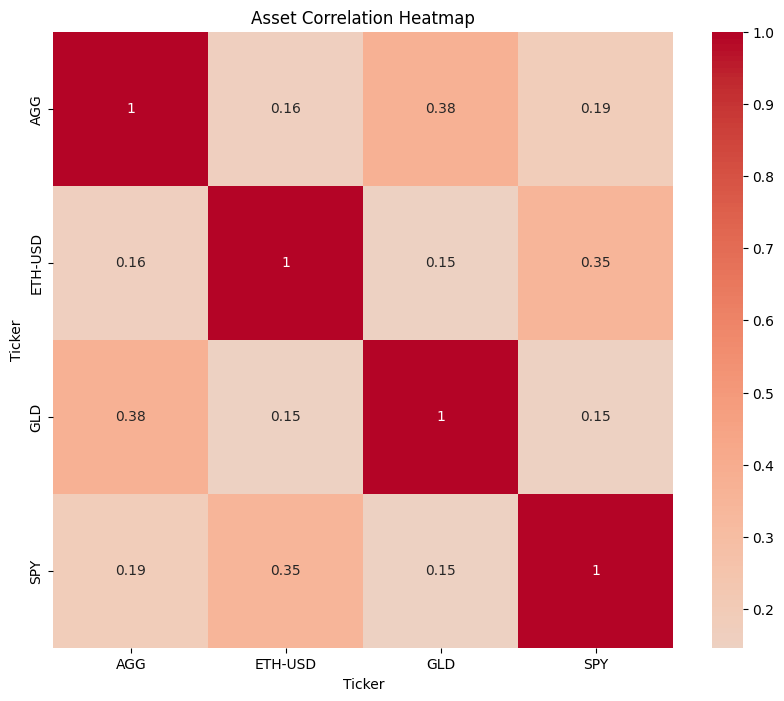

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# Fetch Ethereum price data
def fetch_ethereum_data(start_date='2020-01-01', end_date='2024-01-01'):
    eth = yf.download('ETH-USD', start=start_date, end=end_date)
    return eth

# Price trend analysis
def price_trend_analysis(eth_data):
    plt.figure(figsize=(12,6))
    plt.plot(eth_data['Close'], label='Ethereum Price')

    # Calculate moving averages
    eth_data['50_MA'] = eth_data['Close'].rolling(window=50).mean()
    eth_data['200_MA'] = eth_data['Close'].rolling(window=200).mean()

    plt.plot(eth_data['50_MA'], label='50-day Moving Average', color='orange')
    plt.plot(eth_data['200_MA'], label='200-day Moving Average', color='red')

    plt.title('Ethereum Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    return eth_data

# Volatility analysis
def volatility_analysis(eth_data):
    # Calculate daily returns
    eth_data['Daily_Return'] = eth_data['Close'].pct_change()

    # Plot volatility
    plt.figure(figsize=(12,6))
    eth_data['Daily_Return'].rolling(window=30).std().plot()
    plt.title('30-day Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.show()

    # Descriptive statistics of returns
    print("Return Statistics:")
    print(eth_data['Daily_Return'].describe())

    return eth_data

# Correlation analysis
def correlation_analysis():
    # Fetch data for Ethereum and other assets
    assets = ['ETH-USD', 'SPY', 'GLD', 'AGG']  # Ethereum, S&P 500, Gold, Bonds
    data = yf.download(assets, start='2020-01-01', end='2024-01-01')['Adj Close']

    # Calculate correlation matrix
    correlation_matrix = data.pct_change().corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Asset Correlation Heatmap')
    plt.show()

    return correlation_matrix

# Main execution
eth_data = fetch_ethereum_data()
eth_with_analysis = price_trend_analysis(eth_data)
volatility_analysis(eth_with_analysis)
correlation_matrix = correlation_analysis()

In [8]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 24.4 MB/s eta 0:00:00


In [9]:
# the following are statistical analysis numbers where we can find out the different ways these can be rounded and detailed
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from arch import arch_model

class EthereumStatisticalAnalyzer:
    def __init__(self, start_date='2020-01-01', end_date='2024-01-01'):
        # Fetch Ethereum data
        self.data = yf.download('ETH-USD', start=start_date, end=end_date)
        self.returns = self.data['Close'].pct_change().dropna()

    def basic_statistics(self):
        """Calculate and display basic statistical measures"""
        stats_dict = {
            'Mean Return': self.returns.mean(),
            'Median Return': self.returns.median(),
            'Standard Deviation': self.returns.std(),
            'Annualized Volatility': self.returns.std() * np.sqrt(252),
            'Skewness': self.returns.skew(),
            'Kurtosis': self.returns.kurtosis(),
            'Minimum': self.returns.min(),
            'Maximum': self.returns.max()
        }

        print("\nBasic Statistical Measures:")
        for key, value in stats_dict.items():
            print(f"{key}: {value:.4f}")

        return stats_dict

    def distribution_analysis(self):
        """Analyze return distribution and test for normality"""
        # Plot return distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(self.returns, bins=50, kde=True)
        plt.title('Ethereum Returns Distribution')
        plt.xlabel('Daily Returns')
        plt.ylabel('Frequency')

        # Add normal distribution for comparison
        x = np.linspace(self.returns.min(), self.returns.max(), 100)
        plt.plot(x, stats.norm.pdf(x, self.returns.mean(), self.returns.std()) * len(self.returns) * (x[1]-x[0]))
        plt.show()

        # Perform normality tests
        shapiro_stat, shapiro_p = stats.shapiro(self.returns)
        ks_stat, ks_p = stats.kstest(self.returns, 'norm')

        print("\nNormality Tests:")
        print(f"Shapiro-Wilk Test - Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
        print(f"Kolmogorov-Smirnov Test - Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")

        # QQ Plot
        plt.figure(figsize=(10, 6))
        stats.probplot(self.returns, dist="norm", plot=plt)
        plt.title("Q-Q Plot of Ethereum Returns")
        plt.show()

    def volatility_analysis(self):
        """Analyze Ethereum's volatility patterns"""
        # Rolling volatility
        window_sizes = [30, 60, 90]
        plt.figure(figsize=(12, 6))

        for window in window_sizes:
            rolling_vol = self.returns.rolling(window=window).std() * np.sqrt(252)
            plt.plot(rolling_vol, label=f'{window}-day Rolling Volatility')

        plt.title('Ethereum Rolling Volatility')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')
        plt.legend()
        plt.show()

        # GARCH model for volatility clustering
        model = arch_model(self.returns * 100, vol='Garch', p=1, q=1)
        results = model.fit(disp='off')

        print("\nGARCH(1,1) Model Results:")
        print(results.summary().tables[1])

        # Plot conditional volatility
        plt.figure(figsize=(12, 6))
        plt.plot(results.conditional_volatility)
        plt.title('GARCH Conditional Volatility')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.show()

    def extreme_value_analysis(self):
        """Analyze extreme returns and tail behavior"""
        # Value at Risk (VaR)
        var_95 = np.percentile(self.returns, 5)
        var_99 = np.percentile(self.returns, 1)

        # Expected Shortfall (ES/CVaR)
        es_95 = self.returns[self.returns <= var_95].mean()
        es_99 = self.returns[self.returns <= var_99].mean()

        print("\nRisk Metrics:")
        print(f"95% Value at Risk: {var_95:.4f}")
        print(f"99% Value at Risk: {var_99:.4f}")
        print(f"95% Expected Shortfall: {es_95:.4f}")
        print(f"99% Expected Shortfall: {es_99:.4f}")

        # Plot extreme returns
        plt.figure(figsize=(12, 6))
        plt.scatter(range(len(self.returns)), self.returns, alpha=0.5)
        plt.axhline(y=var_95, color='r', linestyle='--', label='95% VaR')
        plt.axhline(y=var_99, color='g', linestyle='--', label='99% VaR')
        plt.title('Ethereum Returns with VaR Levels')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

    def stationarity_test(self):
        """Test for stationarity in returns"""
        result = adfuller(self.returns)

        print('\nAugmented Dickey-Fuller Test:')
        print(f'ADF Statistic: {result[0]:.4f}')
        print(f'p-value: {result[1]:.4f}')
        print('Critical values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.4f}')

    def run_full_analysis(self):
        """Run all analyses"""
        self.basic_statistics()
        self.distribution_analysis()
        self.volatility_analysis()
        self.extreme_value_analysis()
        self.stationarity_test()

# Create analyzer instance and run analysis
analyzer = EthereumStatisticalAnalyzer()
analyzer.run_full_analysis()

[*********************100%***********************]  1 of 1 completed


Basic Statistical Measures:


TypeError: unsupported format string passed to Series.__format__

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

class BitcoinBasicStats:
    def __init__(self, start_date='2020-01-01', end_date='2024-01-01'):
        # Download Bitcoin data
        self.btc = yf.download('BTC-USD', start=start_date, end=end_date)
        # Calculate daily returns
        self.returns = self.btc['Close'].pct_change().dropna()

    def calculate_basic_stats(self):
        # Daily statistics
        daily_stats = {
            'Daily Return Statistics': {
                'Mean Return': float(self.returns.mean()),
                'Median Return': float(self.returns.median()),
                'Standard Deviation': float(self.returns.std()),
                'Daily Volatility': float(self.returns.std()),
                'Skewness': float(self.returns.skew()),
                'Kurtosis': float(self.returns.kurtosis()),
                'Minimum Return': float(self.returns.min()),
                'Maximum Return': float(self.returns.max())
            }
        }

        # Annualized statistics
        annualized_stats = {
            'Annualized Statistics': {
                'Annualized Mean Return': float(self.returns.mean() * 252),
                'Annualized Volatility': float(self.returns.std() * np.sqrt(252))
            }
        }

        # Print results
        print("\nBitcoin Statistical Analysis")
        print("=" * 50)

        print("\nDaily Return Statistics:")
        print("-" * 30)
        for key, value in daily_stats['Daily Return Statistics'].items():
            print(f"{key}: {value:.4%}")

        print("\nAnnualized Statistics:")
        print("-" * 30)
        for key, value in annualized_stats['Annualized Statistics'].items():
            print(f"{key}: {value:.4%}")

        return {**daily_stats, **annualized_stats}

# Run the analysis
def run_analysis(start_date='2020-01-01', end_date='2024-01-01'):
    analyzer = BitcoinBasicStats(start_date, end_date)
    return analyzer.calculate_basic_stats()

# Execute the analysis
if __name__ == "__main__":
    stats = run_analysis()

[*********************100%***********************]  1 of 1 completed


Bitcoin Statistical Analysis

Daily Return Statistics:
------------------------------
Mean Return: 0.1832%
Median Return: 0.0618%
Standard Deviation: 3.4799%
Daily Volatility: 3.4799%
Skewness: -64.2585%
Kurtosis: 1176.4617%
Minimum Return: -37.1695%
Maximum Return: 18.7465%

Annualized Statistics:
------------------------------
Annualized Mean Return: 46.1787%
Annualized Volatility: 55.2413%



/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Mean Return': float(self.returns.mean()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Median Return': float(self.returns.median()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Standard Deviation': float(self.returns.std()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError 